#### In this image classification problem, I have taken famous handwritten digits, mnist datasets from keras library..

At first I will make my own standard neural network model to predict the images and after that I will take LeNet CNN model that was first introduced by Yann LeCun at 1998 .. and then we will compare these two...at last I also tune the model with keras tuner and will see if any improvement happen..

* Importing libraries

In [4]:
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,Flatten
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
import math

from tensorflow.keras import layers
#from kerastuner.tuners import RandomSearch

Loading MNIST Data sets

In [5]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print('Data sets loaded...')

Data sets loaded...


In [6]:
x_train = x_train/255.0
x_test = x_test/255.0
print('Data sets processed...')
print(f'train shape:{x_train.shape} and test shape:{x_test.shape}')

Data sets processed...
train shape:(60000, 28, 28) and test shape:(10000, 28, 28)


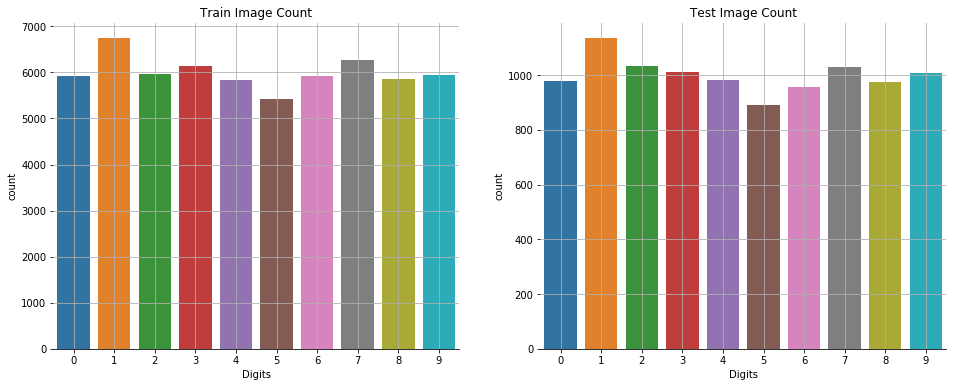

In [7]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
sns.countplot(y_train,ax=ax1)
sns.countplot(y_test,ax=ax2)
ax1.set_xlabel('Digits')
ax1.set_title('Train Image Count')
ax2.set_xlabel('Digits')
ax2.set_title('Test Image Count')
ax1.grid()
ax2.grid()
sns.despine(left=True)
plt.show()

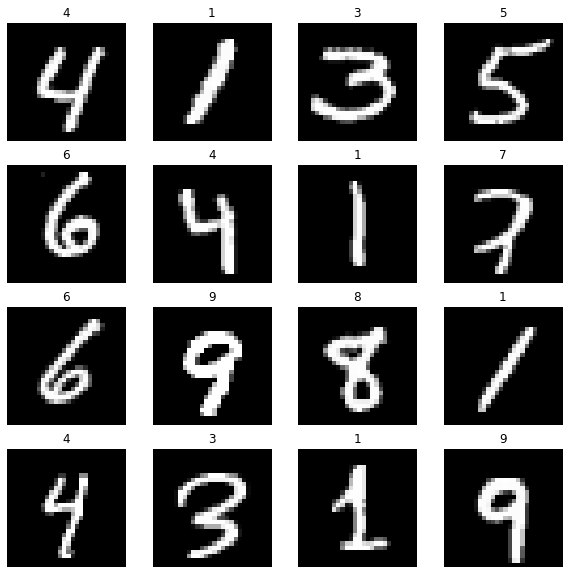

In [8]:
fig, axes = plt.subplots( 4,4,figsize = (10,10))
for row in axes:
    for axe in row:
        index = np.random.randint(60000)
        axe.imshow(x_train[index], cmap='gray')
        axe.set_title(y_train[index])
        axe.set_axis_off()

# First Making ANN Model 

In [9]:
x_train = x_train.reshape(-1,784)
y_train = keras.utils.to_categorical(y_train,num_classes=10)
x_test = x_test.reshape(-1,784)
y_test = keras.utils.to_categorical(y_test,num_classes=10)

In [10]:
model = Sequential() # my ANN model

model.add(Dense(1024, activation='relu', input_dim=784))
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
                
adam = Adam(learning_rate=0.0004)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [12]:
hist = model.fit(x_train, y_train,epochs=80,validation_data=(x_test,y_test),batch_size=128)


Train on 60000 samples, validate on 10000 samples
Epoch 1/80
60000/60000 [==============================] - 25s 420us/step - loss: 0.3395 - accuracy: 0.8968 - val_loss: 0.1330 - val_accuracy: 0.9572
Epoch 2/80
60000/60000 [==============================] - 25s 410us/step - loss: 0.1293 - accuracy: 0.9609 - val_loss: 0.0866 - val_accuracy: 0.9727
Epoch 3/80
60000/60000 [==============================] - 23s 385us/step - loss: 0.0944 - accuracy: 0.9706 - val_loss: 0.0805 - val_accuracy: 0.9742
Epoch 4/80
60000/60000 [==============================] - 28s 467us/step - loss: 0.0748 - accuracy: 0.9768 - val_loss: 0.0754 - val_accuracy: 0.9748
Epoch 5/80
60000/60000 [==============================] - 28s 462us/step - loss: 0.0624 - accuracy: 0.9807 - val_loss: 0.0646 - val_accuracy: 0.9798
Epoch 6/80
60000/60000 [==============================] - 27s 454us/step - loss: 0.0510 - accuracy: 0.9833 - val_loss: 0.0665 - val_accuracy: 0.9801
Epoch 7/80
60000/60000 [==============================]

Epoch 54/80
60000/60000 [==============================] - 21s 351us/step - loss: 0.0077 - accuracy: 0.9977 - val_loss: 0.0710 - val_accuracy: 0.9867
Epoch 55/80
60000/60000 [==============================] - 21s 358us/step - loss: 0.0085 - accuracy: 0.9972 - val_loss: 0.0758 - val_accuracy: 0.9855
Epoch 56/80
60000/60000 [==============================] - 21s 352us/step - loss: 0.0088 - accuracy: 0.9972 - val_loss: 0.0633 - val_accuracy: 0.9864
Epoch 57/80
60000/60000 [==============================] - 22s 368us/step - loss: 0.0072 - accuracy: 0.9977 - val_loss: 0.0730 - val_accuracy: 0.9855
Epoch 58/80
60000/60000 [==============================] - 21s 348us/step - loss: 0.0073 - accuracy: 0.9975 - val_loss: 0.0686 - val_accuracy: 0.9867
Epoch 59/80
60000/60000 [==============================] - 22s 366us/step - loss: 0.0078 - accuracy: 0.9975 - val_loss: 0.0760 - val_accuracy: 0.9856
Epoch 60/80
60000/60000 [==============================] - 22s 365us/step - loss: 0.0081 - accuracy:

In [13]:
result = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 138us/step


In [14]:
print('Test Accuracy  :',round(result[1],4)*100,'%')
print('Test Error rate:',round(result[0],4))

Test Accuracy  : 98.7 %
Test Error rate: 0.081


In [15]:
val_acc = hist.history['val_accuracy']
acc = hist.history['accuracy']
acc = np.array(acc)*100 
val_acc = np.array(val_acc)*100


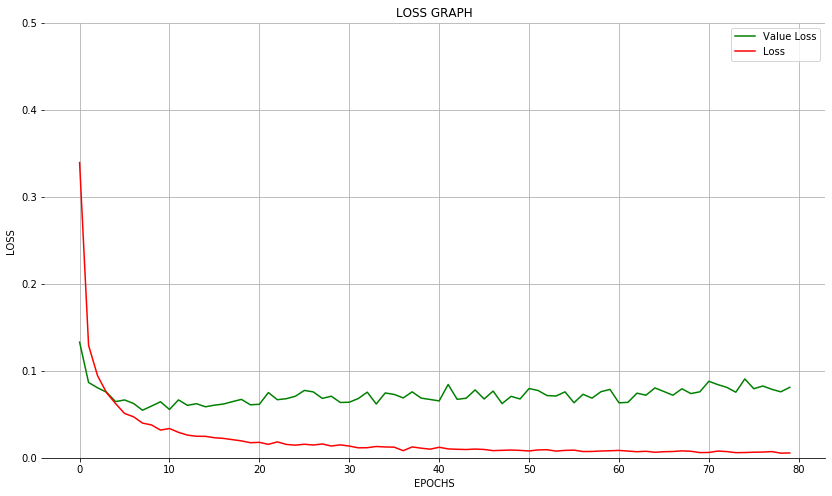

In [16]:
fig = plt.figure(figsize=(14,8))
plt.plot(np.arange(len(hist.history['val_loss'])),hist.history['val_loss'],'-g')
plt.plot(np.arange(len(hist.history['loss'])),hist.history['loss'],c='r')
plt.ylim(0.0,0.5)
plt.title('LOSS GRAPH')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS ')
plt.legend(['Value Loss','Loss'], loc='upper right')
plt.grid()
sns.despine(left=True)
plt.show()

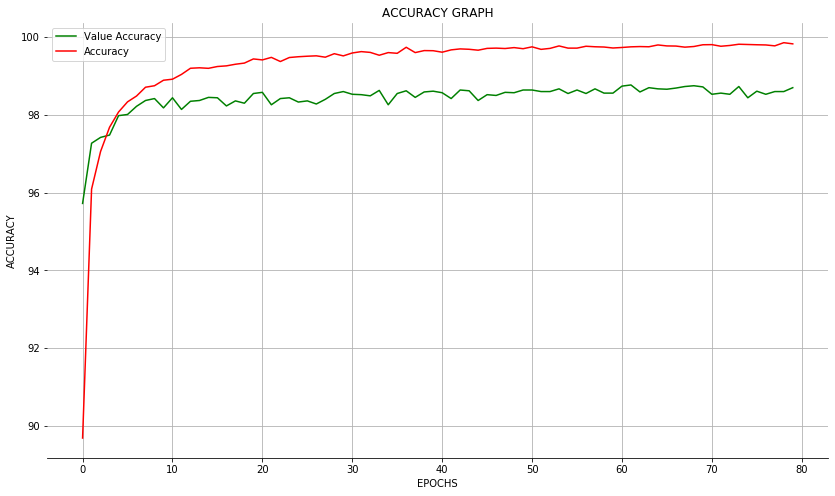

In [17]:
fig = plt.figure(figsize=(14,8))
plt.plot(np.arange(len(val_acc)),val_acc,'-g')
plt.plot(np.arange(len(acc)),acc,c='r')
plt.title('ACCURACY GRAPH')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.legend(['Value Accuracy','Accuracy'], loc='upper left')
plt.grid()
sns.despine(left=True)
plt.show()

**Finding few wrong predictions**

In [18]:
pred = model.predict(x_test)

In [19]:
wrong_pred = []
wrong_image = []
for i in range(len(y_test)):
    if np.argmax(y_test[i]) != np.argmax(pred[i]):
        wrong_pred.append(np.argmax(pred[i]))
        wrong_image.append(x_test[i])
    else:
        pass

In [20]:
accuracy = (len(pred)-len(wrong_pred))*100/len(pred)
print('Calculating Actual Accuracy :',accuracy,'%')

Calculating Actual Accuracy : 98.7 %


In [21]:
print(f'Total Number of Correct Predicted Images from test data :{10000-len(wrong_pred)}')
print(f'Total Number of Wrong Predicted Images from test data   :{len(wrong_pred)}')

Total Number of Correct Predicted Images from test data :9870
Total Number of Wrong Predicted Images from test data   :130


**Results for ANN model is not Bad**

In [22]:
model.save('mnist_ann.h5')                     # saving model
del model
print('model saved..and deleted..')

model saved..and deleted..


### Now we will go for CNN model

* You can see the different error rate with different classifier from this site -> click below

http://yann.lecun.com/exdb/mnist/

## *Now, I will train this image datasets with CNN algorithm, similar to LeNet architecture, first introduced by Yann LeeCun in 1998..

### the model was like this


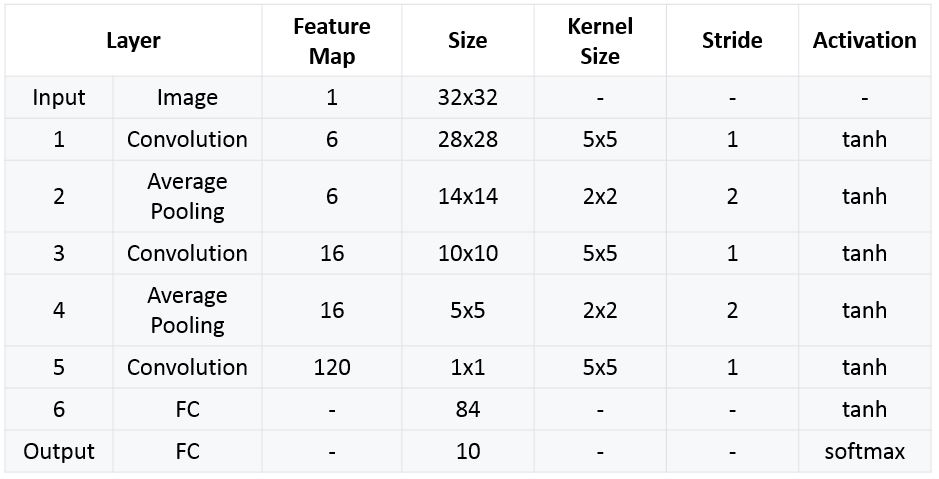


# Making LeNet like CNN model

### reshaping the data sets for CNN model

In [23]:
xtrain = x_train.reshape(-1,28,28,1)
xtest = x_test.reshape(-1,28,28,1)

In [24]:
xtrain.shape,xtest.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [25]:
model = Sequential()

# CNN-LAYERS
model.add(Conv2D(6, (5, 5), activation='relu',padding='same', input_shape=(xtrain[0].shape)))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(Conv2D(120, (5, 5), activation='relu'))

# ANN-LAYERS
model.add(Flatten())
model.add(Dense(84, activation='relu'))

# Classification layer
model.add(Dense(10, activation='softmax'))

adam = Adam(learning_rate=0.0002,beta_1=0.9,beta_2=0.999)
model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 84)               

#### In comparison to LeNet I have changed only two things ->
#### 1. taken MaxPooling2D inspite of AveragePooling2D
#### 2. taken Relu activation function inspite of tanh
#### however all other parameters are similar..

In [27]:
hist = model.fit(xtrain, y_train,validation_data=(xtest,y_test),batch_size=32,epochs=50,verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 32s - loss: 0.3608 - accuracy: 0.8976 - val_loss: 0.1230 - val_accuracy: 0.9618
Epoch 2/50
 - 22s - loss: 0.1091 - accuracy: 0.9671 - val_loss: 0.0794 - val_accuracy: 0.9763
Epoch 3/50
 - 22s - loss: 0.0790 - accuracy: 0.9755 - val_loss: 0.0570 - val_accuracy: 0.9821
Epoch 4/50
 - 22s - loss: 0.0624 - accuracy: 0.9811 - val_loss: 0.0580 - val_accuracy: 0.9822
Epoch 5/50
 - 22s - loss: 0.0517 - accuracy: 0.9843 - val_loss: 0.0470 - val_accuracy: 0.9837
Epoch 6/50
 - 22s - loss: 0.0433 - accuracy: 0.9869 - val_loss: 0.0493 - val_accuracy: 0.9836
Epoch 7/50
 - 22s - loss: 0.0381 - accuracy: 0.9882 - val_loss: 0.0493 - val_accuracy: 0.9841
Epoch 8/50
 - 22s - loss: 0.0332 - accuracy: 0.9895 - val_loss: 0.0372 - val_accuracy: 0.9869
Epoch 9/50
 - 22s - loss: 0.0290 - accuracy: 0.9908 - val_loss: 0.0333 - val_accuracy: 0.9890
Epoch 10/50
 - 24s - loss: 0.0250 - accuracy: 0.9919 - val_loss: 0.0310 - val_accuracy: 0.9899
Epoch 11/

In [29]:
print('Test Accuracy  :',round(result[1]*100,3),'%')
print('Test Error rate:',round(result[0],4))

Test Accuracy  : 98.7 %
Test Error rate: 0.081


In [30]:
val_acc = hist.history['val_accuracy']
val_acc = np.array(val_acc)*100
acc = hist.history['accuracy']
acc = np.array(acc)*100
loss = hist.history['loss']
val_loss = hist.history['val_loss']

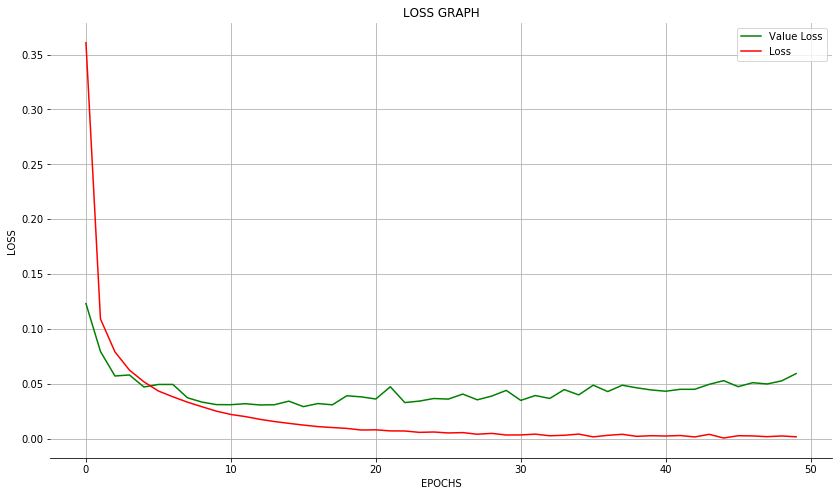

In [31]:
fig = plt.figure(figsize=(14,8))
plt.plot(np.arange(len(val_loss)),val_loss,'-g')
plt.plot(np.arange(len(loss)),loss,c='r')
plt.title('LOSS GRAPH')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend(['Value Loss','Loss'], loc='upper right')
plt.grid()
sns.despine(left=True)
plt.show()

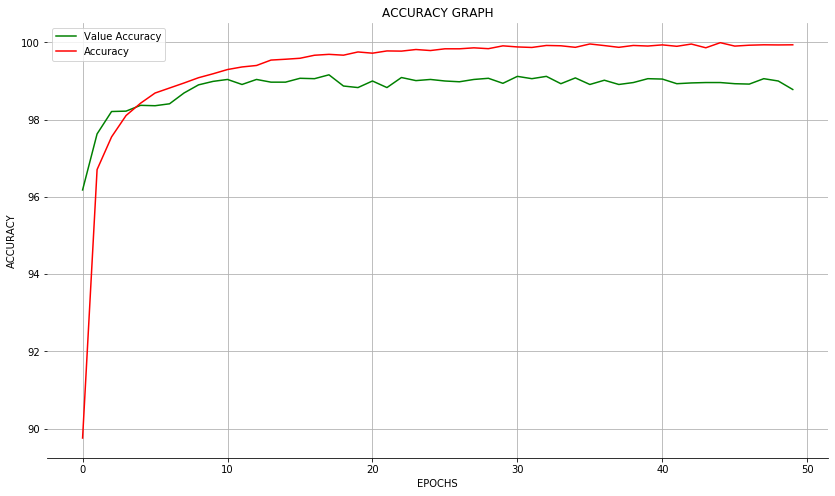

In [32]:
fig = plt.figure(figsize=(14,8))
plt.plot(np.arange(len(val_acc)),val_acc,'-g')
plt.plot(np.arange(len(acc)),acc,c='r')
plt.title('ACCURACY GRAPH')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.legend(['Value Accuracy','Accuracy'], loc='upper left')
plt.grid()
sns.despine(left=True)
plt.show()

In [33]:
preda = model.predict(xtest).round()

In [34]:
wrong_pred = []
wrong_image = []
for i in range(len(y_test)):
    if np.argmax(y_test[i]) != np.argmax(preda[i]):
        wrong_pred.append(np.argmax(preda[i]))
        wrong_image.append(xtest[i])
    else:
        pass

In [35]:
accuracy = (len(preda)-len(wrong_pred))*100/len(preda)
print('Calculating Actual Accuracy :',accuracy,'%')

Calculating Actual Accuracy : 98.77 %


In [37]:
print(f'Total Number of Correct Predicted Images from test data :{len(y_test)-len(wrong_pred)}')
print(f'Total Number of Wrong Predicted Images from test data   :{len(wrong_pred)} out of {len(y_test)} images..')
print('Test Error rate:',round(result[0],4))

Total Number of Correct Predicted Images from test data :9877
Total Number of Wrong Predicted Images from test data   :123 out of 10000 images..
Test Error rate: 0.081


In [38]:
print(f'total no. of prediction improved from test data:{146-89}')

total no. of prediction improved from test data:57


In [39]:
model.save('mnist_cnn_LeNet.h5')            # saving model
#del model                                   ,

In [40]:
model = load_model('mnist_cnn_LeNet.h5')    # loading model
print('Model loaded..')

Model loaded..


In [41]:
prediction = model.predict(x_test.reshape(-1,28,28,1)).round()

In [42]:
wrong_index_list = []
for i in range(len(y_test)):
    if np.argmax(y_test[i]) != np.argmax(prediction[i]):
        wrong_index_list.append(i)
    else:
        pass

Few predicted Images :->


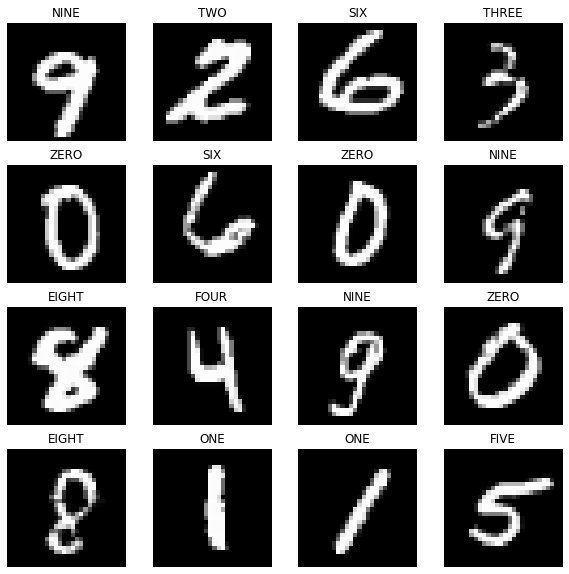

In [43]:
category = {0:'ZERO',1:'ONE',2:'TWO',3:'THREE',4:'FOUR',5:'FIVE',6:'SIX',7:'SEVEN',8:'EIGHT',9:'NINE'}
fig, axes = plt.subplots( 4,4,figsize = (10,10))
print('Few predicted Images :->')
for row in axes:
    for axe in row:
        index = np.random.randint(len(x_test))
        axe.imshow(x_test[index].reshape(28,28), cmap='gray')
        axe.set_title(category[np.argmax(y_test[index])])
        axe.set_axis_off()

Few Wrong predicted Images :->


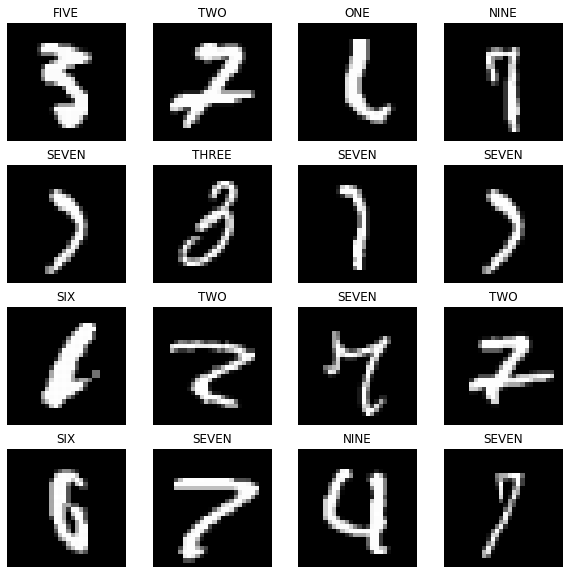

In [44]:
fig, axes = plt.subplots( 4,4,figsize = (10,10))
print('Few Wrong predicted Images :->')
for row in axes:
    for axe in row:
        index = np.random.randint(len(wrong_index_list))
        axe.imshow(x_test[wrong_index_list[index]].reshape(28,28), cmap='gray')
        axe.set_title(category[np.argmax(pred[wrong_index_list[index]])])
        axe.set_axis_off()

* conclusion:-

* From the first LeNet architecture we can find -->

1.  test error rate reduced much

2.  test accuracy also increased

3.  It was the first CNN algorithm ever used for image classification so far.

4.  Now a days many state of the art CNN algorithm has introduced and giving much more better result for image classifications.


In [46]:
Xtest = pd.read_csv('test.csv')
print("kaggle test data loaded..")
print("shape of test data :",Xtest.shape)

FileNotFoundError: [Errno 2] File test.csv does not exist: 'test.csv'

In [252]:
X_test = np.array(Xtest).reshape(-1,28,28,1)
X_test.shape

(28000, 28, 28, 1)

In [253]:
X_test = X_test/255.0

In [254]:
len(X_test)

28000

In [255]:
prediction = model.predict(X_test)

In [256]:
len(prediction)

28000

In [258]:
Final_model = pd.read_csv('model.csv')
Final_model['Label'] = lstt
Final_model.head(2)

,ImageId,Label
0,1,2
1,2,0


In [259]:
def predictImage(index=0):
    plt.imshow(X_test[index].reshape(28,28))
    plt.title(category[lstt[index]])
    plt.axis('off')
    plt.show()

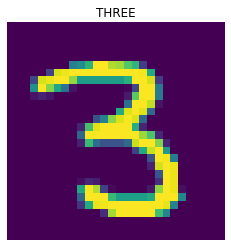

In [260]:
predictImage(index=1300)